In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# 한글
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
elif platform.system() == "Darwin":
    rc('font', family = 'AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='이름'>

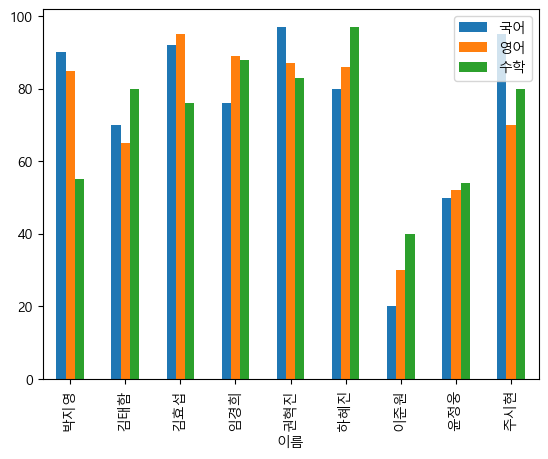

In [11]:
# student.csv 파일 읽어오기
# 이름 열을 인덱스로
df = pd.read_csv('./data4/student.csv', encoding= 'cp949', index_col='이름')
# print(df.head())

# 원본 데이터로 막대그래프 생성
df.plot(kind = 'bar')

In [18]:
# 단순한 표준화 작업으로 성적을 비교하는데 어려울 수 있음
# 이런 경우 표준값이나 편차를 구해서 비교하는 것이 좋음
# 평균과 표준편차 구하기
kormean, korstd = df['국어'].mean(), df['국어'].std()
engmean, engstd = df['영어'].mean(), df['영어'].std()
matmean, matstd = df['수학'].mean(), df['수학'].std()

# 표준값 구하기
df['국어표준값'] = (df['국어'] - kormean) / korstd
df['영어표준값'] = (df['영어'] - engmean) / engstd
df['수학표준값'] = (df['수학'] - matmean) / matstd

# 편차값 구하기
df['국어편차값'] = df['국어표준값'] * 10 + 50
df['영어편차값'] = df['영어표준값'] * 10 + 50
df['수학편차값'] = df['수학표준값'] * 10 + 50

df

,국어,영어,수학,국어표준값,영어표준값,수학표준값,국어편차값,영어편차값,수학편차값
이름,,,,,,,,,
박지영,90,85,55,0.616320,0.554321,-0.941716,56.163201,55.543208,40.582843
김태함,70,65,80,-0.176091,-0.386979,0.399335,48.239085,46.130213,53.993351
김효섭,92,95,76,0.695561,1.024971,0.184767,56.955613,60.249706,51.847670
임경희,76,89,88,0.061632,0.742581,0.828471,50.616320,57.425807,58.284714
권혁진,97,87,83,0.893664,0.648451,0.560261,58.936642,56.484508,55.602612
하혜진,80,86,97,0.220114,0.601386,1.311250,52.201143,56.013858,63.112497
이준원,20,30,40,-2.157120,-2.034253,-1.746346,28.428796,29.657471,32.536538
윤정웅,50,52,54,-0.968503,-0.998823,-0.995358,40.314970,40.011766,40.046423
주시현,95,70,80,0.814423,-0.151654,0.399335,58.144230,48.483462,53.993351


### 표준화

In [22]:
auto_mpg = pd.read_csv('./data4/auto-mpg.csv', header = None)
auto_mpg.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','name']

auto_mpg['horsepower'].replace('?', np.nan, inplace = True)
auto_mpg.dropna(subset = ['horsepower'], axis = 0, inplace = True)
auto_mpg['horsepower'] = auto_mpg['horsepower'].astype('float')
print(auto_mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                       name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [23]:
# horsepower 열의 표준화
auto_mpg['maxhorsepower'] = auto_mpg['horsepower'] / auto_mpg['horsepower'].max()
auto_mpg['minmaxhorsepower'] = (auto_mpg['horsepower'] - auto_mpg['horsepower'].min())/ (auto_mpg['horsepower'].max() - auto_mpg['horsepower'].min())

auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,maxhorsepower,minmaxhorsepower
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.454215,0.317768
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.167353,0.209191
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.200000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.326087,0.157609
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.406522,0.258152
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.547826,0.434783
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000


In [24]:
from sklearn import preprocessing
# 스케일링을 수행할 데이터를 가져오기
x = auto_mpg[['horsepower']].values
# type(x)

print('mean', np.mean(x))
print('std', np.std(x))
print('max', np.max(x))
print('min', np.min(x))

scaler = preprocessing.StandardScaler() # StandardScaler 대신 바꿔가면서 하면 됨
# scaler.fit(x)
# x_scaled = scaler.transform(x)

x_scaled = scaler.fit_transform(x)
print('\n스케일링 과정 ')
print('mean', np.mean(x_scaled))
print('std', np.std(x_scaled))
print('max', np.max(x_scaled))
print('min', np.min(x_scaled))
      

mean 104.46938775510205
std 38.44203271442593
max 230.0
min 46.0

스케일링 과정 
mean -1.812609019796174e-16
std 0.9999999999999998
max 3.2654519904664348
min -1.5209754434541274


### 정규화

In [25]:
feature = np.array([[1,2],[2,3],[3,8],[4,2],[7,2]])
# 정규화 객체
# l1 을 norm 에 적용하면 맨하튼 거리 - 합치면 1
# l2 를 norm 에 적용하면 유클리드 거리 - 각 값을 전체 데이터를 제곱해서 더한 값의 제곱근으로 나눔
normalizer = preprocessing.Normalizer(norm= 'l1')
l2_norm = normalizer.transform(feature)
print(l2_norm)

[[0.33333333 0.66666667]
 [0.4        0.6       ]
 [0.27272727 0.72727273]
 [0.66666667 0.33333333]
 [0.77777778 0.22222222]]


In [26]:
# 다항과 교차항 생성
features = np.array([[1,2],[2,3],[3,8],[4,2],[7,2]])

# 제곱항까지의 다항을 생성 - 열의 개수가 늘어나게 되는데
# 회귀 분석을 할 때 시간의 흐름에 따라 변화가 급격하게 일어나는 경우
# 데이터가 부족할 때 샘플 데이터를 추가하기 위해서 사용
# 제곱을 하거나 곱하기를 하게 되면 데이터의 특성 자체는 크게 변화하지 않기 때문에 사용
polynomialer = preprocessing.PolynomialFeatures(degree=2, include_bias = False, interaction_only = True)
result = polynomialer.fit_transform(features)
print(result)

[[ 1.  2.  2.]
 [ 2.  3.  6.]
 [ 3.  8. 24.]
 [ 4.  2.  8.]
 [ 7.  2. 14.]]


In [27]:
# 하나의 함수 적용
features = np.array([[1,2],[2,3],[3,8],[4,2],[7,2]])

# 위의 데이터에 함수 적용
result1 = preprocessing.FunctionTransformer(lambda x : x + 1).transform(features)
# print(result1)

df = pd.DataFrame(features, columns = ['feature1','feature2'])
print(df.apply(lambda x : x + 1).values)

[[2 3]
 [3 4]
 [4 9]
 [5 3]
 [8 3]]


In [28]:
# 컬럼 별로 다른 함수 적용
from sklearn.compose import ColumnTransformer
def add_one(x):
    return x + 1

def sub_one(x):
    return x - 1

result2 = ColumnTransformer([('add_one', preprocessing.FunctionTransformer(add_one, validate = True),['feature1']),
                            ('sub_one', preprocessing.FunctionTransformer(sub_one, validate = True), ['feature2'])]).fit_transform(df)
print(result2)

[[2 1]
 [3 2]
 [4 7]
 [5 1]
 [8 1]]


In [33]:
# auto_mpg의 horsepower 를 3개의 구간을 분할
# auto_mpg['horsepower'].describe()

# 경계값 찾기
count, bin_dividers = np.histogram(auto_mpg['horsepower'], bins =3)
print(count, bin_dividers)

# 각 그룹에 할당할 값의 리스트
bin_names = ['저출력', '보통출력', '고출력']
auto_mpg['hp_bin'] = pd.cut(x = auto_mpg['horsepower'], bins = bin_dividers, labels = bin_names, include_lowest =True)
print(auto_mpg[['horsepower','hp_bin']].head(20))

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]
    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력
15        95.0    저출력
16        97.0    저출력
17        85.0    저출력
18        88.0    저출력
19        46.0    저출력


In [34]:
# numpy 에서는 그룹의 명칭을 설정하지 않고 0, 1, 2 처럼 인덱스로 구분
result = np.digitize(auto_mpg['horsepower'], bins = [107.33333333 , 168.66666667 , 230.0], right = True)
print(result)

[1 1 1 1 1 2 2 2 2 2 2 1 1 2 0 0 0 0 0 0 0 0 0 1 0 2 2 2 2 0 0 0 0 0 0 0 0
 1 2 1 1 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 1 1 2 0 1 1 1
 1 1 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 2 2 0 0 0 0 0 0 1 1 2 2 0 0 0 0 0
 0 0 0 1 2 0 0 0 1 1 1 1 2 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 2 1 1 1 0 0 0 0 0 1 1 1
 1 1 0 0 0 2 2 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [42]:
# sklearn 의 binning(구간 분할)

age = np.array([[13],[30],[67],[36],[20],[33],[27],[19]])
# 2개 그룹으로 분할
binarizer = preprocessing.Binarizer(threshold = 30.0)
result = binarizer.transform(age)
print(result, "\n")


# 여러 개의 그룹으로 분할
# 4개의 그룹으로 일련번호 형태로 일정한 비율로 분할
# strategy에 uniform 을 설정하면 간격을 일정하게 분할
# encode 가 ordinal 이면 일련번호로 그룹이 생성
# onehot 을 설정하면 onehot encoding 을 한 후 희소행렬로
# onehot-dense 를 설정하면 onehot encoding 을 한 후 밀집행렬로
kb = preprocessing.KBinsDiscretizer(4, encode = 'ordinal', strategy = 'quantile')
result = kb.fit_transform(age)
print(result)

[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]] 

[[0.]
 [2.]
 [3.]
 [3.]
 [1.]
 [2.]
 [1.]
 [0.]]


In [46]:
# 군집 분석을 이용한 구간 분할
from sklearn.cluster import KMeans

sample = np.array([[13,30],[30,40],[67,44],[26,24],[22, 11],[98,28]])
df = pd.DataFrame(sample, columns = ['feature1', 'feature2'])
print(df)

cluster = KMeans(3, random_state = 10)
cluster.fit(sample)

df['group'] = cluster.predict(sample)
df

   feature1  feature2
0        13        30
1        30        40
2        67        44
3        26        24
4        22        11
5        98        28


c:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,feature1,feature2,group
0,13,30,1
1,30,40,1
2,67,44,0
3,26,24,1
4,22,11,1
5,98,28,2


In [55]:
# 이상치 감지
# z-score를 구해주는 함수
# 데이터가 12개보다 작으면 이상치가 없다고 판단
def outliers_zscore(ys):
    # 표준편차 임계값
    threshold = 3

    mean_y = np.mean(ys)
    print('mean :', mean_y)
    stdev_y = np.std(ys)
    print('std :' , stdev_y)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    print('z-scores :' , z_scores)
    print()
    return np.where(np.abs(z_scores) > threshold)

features = np.array([[5,1,10,10,7,6],[111111,20000,3,23,11,243556]])
outliers_zscore(features)

mean : 31228.583333333332
std : 70923.95424144831
z-scores : [array([-0.44024031, -0.4402967 , -0.44016981, -0.44016981, -0.44021211,
       -0.44022621]), array([ 1.12631081, -0.15831863, -0.44026851, -0.43998651, -0.44015571,
        2.99373348])]



(array([], dtype=int64), array([], dtype=int64))

In [59]:
# 이상치 감지
# z-score 보정
def outliers_modified_zscore(ys):
    # 표준편차 임계값
    threshold = 3.5

    median_y = np.median(ys)
    print('median :', median_y)
    stdev_y = np.median([np.abs(y-median_y) for y in ys])
    print('std :' , stdev_y)
    z_scores = [0.6745 * (y - median_y) / stdev_y for y in ys]
    print('z-scores :' , z_scores)
    print()
    return np.where(np.abs(z_scores) > threshold)

features = np.array([[5,1,10,10,7,6],[111111,20000,3,23,11,243556]])
outliers_modified_zscore(features)

median : 10.0
std : 6.0
z-scores : [array([-0.56208333, -1.01175   ,  0.        ,  0.        , -0.33725   ,
       -0.44966667]), array([ 1.24896041e+04,  2.24720917e+03, -7.86916667e-01,  1.46141667e+00,
        1.12416667e-01,  2.73786295e+04])]



(array([1, 1, 1], dtype=int64), array([0, 1, 5], dtype=int64))

In [60]:
# IQR 을 이용하는 방법
def outliers_iqr(ys):
    # 1사분위수와 3사분위수 구하기
    quantile_1, quantile_3 = np.percentile(ys, [25,75])
    iqr = quantile_3 - quantile_1
    # 일반적인 데이터의 상한과 하한을 구하기
    lower_bound = quantile_1 - (iqr * 1.5)
    upper_bound = quantile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

features = np.array([[5,1,10,10,7,6],[111111,20000,3,23,11,243556]])
outliers_iqr(features)

(array([1, 1, 1], dtype=int64), array([0, 1, 5], dtype=int64))

In [67]:
#일정 비율의 데이터를 이상치로 간주하기
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

#10행 2열의 데이터를 중앙점을 1.0으로 해서 랜덤하게 생성
features, _ = make_blobs(n_samples =10, n_features =2, centers=1, random_state=42)
print(features)

# 첫번째 행의 데이터를 이상치로 수정
features[0,0] = 10000
features[0,1] = 10000

# 이상치 감지 객체를 생성 - 이상치 비율을 설정
outlier_detector = EllipticEnvelope(contamination = 0.1)
outlier_detector.fit(features)
# 이상치로 판정되면 -1 리턴, 그렇지 않으면 1을 리턴
outlier_detector.predict(features)

[[-2.743351    8.78014917]
 [-3.4172217   7.60198243]
 [-3.52202874  9.32853346]
 [-2.26723535  7.10100588]
 [-2.97261532  8.54855637]
 [-1.04354885  8.78850983]
 [-1.86150908 10.53731598]
 [-2.97867201  9.55684617]
 [-4.23411546  8.4519986 ]
 [-0.92998481  9.78172086]]


array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [70]:
# 이상치 처리
houses = pd.DataFrame()
houses['price'] = [500000, 390000, 290000, 6000000]
houses['Rooms'] = [2, 3, 5, 116]
houses['Feet'] = [1500, 2000, 1300, 20000]

# Rooms 값이 20보다 크면 이상치로 간주하고 특성을 추가
houses['outlier'] = np.where(houses['Rooms']>20, 1, 0)
# houses

# outlier 의 영향을 최소화 - 특성 변환(로그변환)
houses['Log_Feet'] = [np.log(x) for x in houses['Feet']]
# houses

# outlier 의 영향을 최소화 - 특성 변환(Scaling)
imsi = pd.DataFrame(houses['Rooms'])
scaler = preprocessing.RobustScaler()
scaler.fit(imsi)
houses['Scaled_Rooms'] = scaler.transform(imsi)
houses

,price,Rooms,Feet,outlier,Log_Feet,Scaled_Rooms
0,500000,2,1500,0,7.313220,-0.066667
1,390000,3,2000,0,7.600902,-0.033333
2,290000,5,1300,0,7.170120,0.033333
3,6000000,116,20000,1,9.903488,3.733333


In [82]:
# 결측치 확인
import seaborn as sns
titanic = sns.load_dataset('titanic')
# titanic.isnull().sum()
# titanic.info()
# titanic['age'].value_counts(dropna = False)

In [83]:
# 결측치 삭제
# 각 컬럼의 None의 개수 파악
# print(titanic.isnull().sum())

# 결측치의 개수가 200개 이상인 컬럼을 제거
# result = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp']]

# 결측치인 행만 제거 - age 행이 결측치인 행을 제거
result_age = titanic.dropna(subset = ['age'], how = 'any', axis = 0)
result_age.info()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    cate

In [95]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
# print(titanic['embark_town'][825:831])
# embark_town 컬럼의 특성이 계절성을 갖는다면 이 경우는 앞의 값으로 채우는 것도
# 나쁘지 않은 방법임
# result = titanic['embark_town'].fillna(method = 'ffill')
# print(result[825:831])

# 결측치가 몇 개 되지 않을 때 대표 값으로 대체
# 대표값으로 사용될 수 있는 데이터는 평균, 중간값, 최빈값 등
# 대표값으로 변환하는 경우 많은 양의 데이터를 변겨하면 분석할 떄 결과가 왜곡될 수 있음
mode = titanic['embark_town'].value_counts()
# 가장 많이 출현한 데이터
# mode.idxmax()
titanic['embark_town'].fillna(mode.idxmax(), inplace = True)
print(titanic['embark_town'][825:831])


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object


In [ ]:
# sklearn 의 Simplelmputer 이용
# 객체를 만들 때 strategy 옵션에 mean, median, most_frequent, constant 를 설정
# constant 를 설정하면 fill_value 옵션에 채울 값을 추가해주어야 함

from sklearn.impute import Simplelmputer

features = np.array([100], [200],[300],[400],[500],[np.nan])
simple_imputer = Simplelmputer(strategy = 'median')
print(simple_imputer.fit_transform(features))


In [101]:
pip install fancyimpute

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for cvxpy from https://files.pythonhosted.org/packages/68/e2/f34fe0c6d675a0514948cd7e7efb8d745ef06680a0a68db9c6ca406da4d8/cvxpy-1.3.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/5b/10/429440cf9b841a5f8645f0aacc6a8da0a87cce4846d45e836f6b5f83be34/cvxopt-1.3.2-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.7 kB ? eta -:--:--
     -------------------------------------- 154.7/154.7 kB 9.0 MB/s eta 0:00:00
  Obtaining dependency information for osqp>=0.4.1 from https://files.pythonhosted.org/packages/b1/e6/fa46181c0f7164704ad501a71191e3890db27461cb4d2ab92c0f37671201/osqp-0.6.3-cp310-cp310-win_amd64.whl.metadata
     -------------------

In [105]:
from fancyimpute import KNN

features = np.array([[100,200],[200,400],[300,600],[400,800],[200, np.nan]])
print(KNN(k = 5, verbose = 0).fit_transform(features))

[[100.        200.       ]
 [200.        400.       ]
 [300.        600.       ]
 [400.        800.       ]
 [200.        400.0000001]]
